# Question 1

### Importing important libraries and functions

In [30]:
from cProfile import label
import pandas as pd
from matplotlib import pyplot as plt

### 1.a -Adding new column named “Avg_Unemployment_Rate”

In [31]:
df = pd.read_csv('USUnemployment.csv')
a=df.iloc[:,1:13].values
l_1=a.mean(axis=1)
df['Avg_Unemployment_Rate']=l_1


### 1.b -Printting the 5 rows of the dataframe with maximum unemployment rate.

In [32]:
df_2 = df.copy()
df_2 = df_2.sort_values(by=["Avg_Unemployment_Rate"],ascending = False)
print(df_2.head(5))

    Year   Jan   Feb   Mar   Apr   May   Jun  Jul  Aug   Sep   Oct   Nov  \
34  1982   8.6   8.9   9.0   9.3   9.4   9.6  9.8  9.8  10.1  10.4  10.8   
62  2010   9.8   9.8   9.9   9.9   9.6   9.4  9.4  9.5   9.5   9.4   9.8   
35  1983  10.4  10.4  10.3  10.2  10.1  10.1  9.4  9.5   9.2   8.8   8.5   
61  2009   7.8   8.3   8.7   9.0   9.4   9.5  9.5  9.6   9.8  10.0   9.9   
63  2011   9.1   9.0   9.0   9.1   9.0   9.1  9.0  9.0   9.0   8.8   8.6   

     Dec  Avg_Unemployment_Rate  
34  10.8               9.708333  
62   9.3               9.608333  
35   8.3               9.600000  
61   9.9               9.283333  
63   8.5               8.933333  


### 2.a - Categorizing year into three different classes named LOW , Medium and High

In [33]:
def cat(AUR):
    if AUR < 4:
        return "Low"
    elif(AUR < 6 and AUR >=4):
        return "Medium"
    else :
        return "High"
l_2 = []
for i in l_1:
    l_2.append(cat(i))
df['Unemployment_Status'] = l_2

### 2.b - Plotting pie chart that displays the percentage of the three classes of Unemployment_Status.

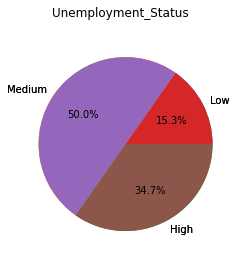

In [34]:
l_3 = [0,0,0]
for i in l_2:
    if i =="Low":
        l_3[0] +=1
    elif i =="Medium":
        l_3[1] +=1
    else :
        l_3[2] +=1
l_4 = ["Low","Medium","High"]
plt.pie(l_3, labels = l_4)
plt.pie(l_3, labels=l_4, autopct='%.1f%%')
plt.suptitle('Unemployment_Status')
plt.show()

### 3.a - Adding specified colun named decade

In [35]:
l_5 = []
for i in range(len(a)):
    b=df.iloc[i,0]
    b = b//10
    l_5.append(str(b)+"0s")
    
df["Decade"] = l_5

l_6 = []
for i in range(len(df.loc[:,"Decade"])):
    if df.loc[i,"Decade"] not in l_6:
        l_6.append(df.loc[i,"Decade"])
        print(df.loc[i,:].values)

[1948 3.4 3.8 4.0 3.9 3.5 3.6 3.6 3.9 3.8 3.7 3.8 4.0 3.75 'Low' '1940s']
[1950 6.5 6.4 6.3 5.8 5.5 5.4 5.0 4.5 4.4 4.2 4.2 4.3 5.208333333333333
 'Medium' '1950s']
[1960 5.2 4.8 5.4 5.2 5.1 5.4 5.5 5.6 5.5 6.1 6.1 6.6 5.541666666666667
 'Medium' '1960s']
[1970 3.9 4.2 4.4 4.6 4.8 4.9 5.0 5.1 5.4 5.5 5.9 6.1 4.983333333333333
 'Medium' '1970s']
[1980 6.3 6.3 6.3 6.9 7.5 7.6 7.8 7.7 7.5 7.5 7.5 7.2 7.175000000000001
 'High' '1980s']
[1990 5.4 5.3 5.2 5.4 5.4 5.2 5.5 5.7 5.9 5.9 6.2 6.3 5.616666666666666
 'Medium' '1990s']
[2000 4.0 4.1 4.0 3.8 4.0 4.0 4.0 4.1 3.9 3.9 3.9 3.9 3.9666666666666663
 'Low' '2000s']
[2010 9.8 9.8 9.9 9.9 9.6 9.4 9.4 9.5 9.5 9.4 9.8 9.3 9.608333333333333
 'High' '2010s']


### 3.b - Printing first row of each decade

In [36]:
l_6 = []
for i in range(len(df.loc[:,"Decade"])):
    if df.loc[i,'Year'] % 10 == 0:
        d=df.loc[i,:].values
        print(d)
    

[1950 6.5 6.4 6.3 5.8 5.5 5.4 5.0 4.5 4.4 4.2 4.2 4.3 5.208333333333333
 'Medium' '1950s']
[1960 5.2 4.8 5.4 5.2 5.1 5.4 5.5 5.6 5.5 6.1 6.1 6.6 5.541666666666667
 'Medium' '1960s']
[1970 3.9 4.2 4.4 4.6 4.8 4.9 5.0 5.1 5.4 5.5 5.9 6.1 4.983333333333333
 'Medium' '1970s']
[1980 6.3 6.3 6.3 6.9 7.5 7.6 7.8 7.7 7.5 7.5 7.5 7.2 7.175000000000001
 'High' '1980s']
[1990 5.4 5.3 5.2 5.4 5.4 5.2 5.5 5.7 5.9 5.9 6.2 6.3 5.616666666666666
 'Medium' '1990s']
[2000 4.0 4.1 4.0 3.8 4.0 4.0 4.0 4.1 3.9 3.9 3.9 3.9 3.9666666666666663
 'Low' '2000s']
[2010 9.8 9.8 9.9 9.9 9.6 9.4 9.4 9.5 9.5 9.4 9.8 9.3 9.608333333333333
 'High' '2010s']


### 4.a - Performing season-wise average such that twelve months grouped into four season

In [37]:
d1 = df.loc[:,['Dec','Jan','Feb']]
d2 = df.loc[:,['Mar','Apr','May']]
d3 = df.loc[:,['Jun','Jul','Aug']]
d4 = df.loc[:,['Sep','Oct','Nov']]

df['Winter'] = d1.mean(axis=1)
df['Spring'] = d2.mean(axis=1)
df['Summer'] = d3.mean(axis=1)
df['Autumn'] = d4.mean(axis=1)

new_df = df.loc[:,['Year','Winter','Spring','Summer','Autumn']]
new_df.set_index("Year",inplace = True)

### 4.b - Creating a line plot for every season

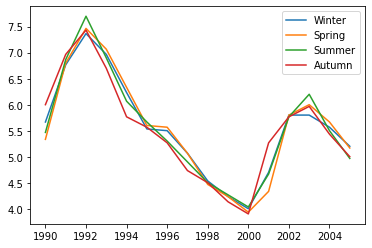

In [38]:
plt.plot(df.loc[42:57,'Year'],df.loc[42:57,'Winter'])
plt.plot(df.loc[42:57,'Year'],df.loc[42:57,'Spring'])
plt.plot(df.loc[42:57,'Year'],df.loc[42:57,'Summer'])
plt.plot(df.loc[42:57,'Year'],df.loc[42:57,'Autumn'])
plt.legend(['Winter','Spring','Summer','Autumn'])
plt.show()

### 5.a - Using new data frame computing horizontal sliding window averages for each season based on the current and the previous 4 years

In [39]:
l = []
for i in range(len(new_df)):
    l.append(0) 
new_df['Winter_mean'] = l
new_df['Spring_mean'] = l
new_df['Summer_mean'] = l
new_df['Autumn_mean'] = l

def mean(lst):  # Function for calculating mean
    sum = 0
    for i in lst:
        sum += i
    return sum/len(lst)

for i in range(len(new_df)-1):
    for j in range(4):
        if i <4:
            new_df.iat[i,j+4] = new_df.iloc[i,j]
        else:
            new_df.iat[i,j+4] = mean(new_df.iloc[i-4:i+1,j])

 ### 5.b - Print the row data for the years 1950, 1960, 1970, 1980, 1990, and 2000

In [40]:
print(new_df.loc['1950':'2000':10,:])

        Winter    Spring    Summer    Autumn  Winter_mean  Spring_mean  \
Year                                                                     
1950  5.733333  5.866667  4.966667  4.266667     5.733333     5.866667   
1960  5.533333  5.233333  5.500000  5.900000     5.173333     5.153333   
1970  4.733333  4.600000  5.000000  5.600000     3.900000     3.840000   
1980  6.600000  6.900000  7.700000  7.500000     6.746667     6.706667   
1990  5.666667  5.333333  5.466667  6.000000     5.940000     5.920000   
2000  4.000000  3.933333  4.033333  3.900000     4.666667     4.653333   

      Summer_mean  Autumn_mean  
Year                            
1950     4.966667     4.266667  
1960     5.293333     5.386667  
1970     3.953333     4.040000  
1980     6.853333     6.766667  
1990     5.860000     5.913333  
2000     4.600000     4.506667  
